In [47]:
import pandas as pd
import random
import numpy as np
from sklearn.linear_model import LinearRegression

In [40]:
# sample a normal distribution 10000 times. mean = 4, std = 0.8
hours_direct_sunlight = [round(random.gauss(7, 1.5), 2) for _ in range(10000)]

In [41]:
# calulate a list, called cm_growth_per_day from hours_direct_sunlight according linear response:
# y = 0.5x + 0.1 + random error
mm_growth_per_day = [round(1 * x + 2 + random.gauss(0, 1), 1) for x in hours_direct_sunlight]

In [42]:
len(mm_growth_per_day)

10000

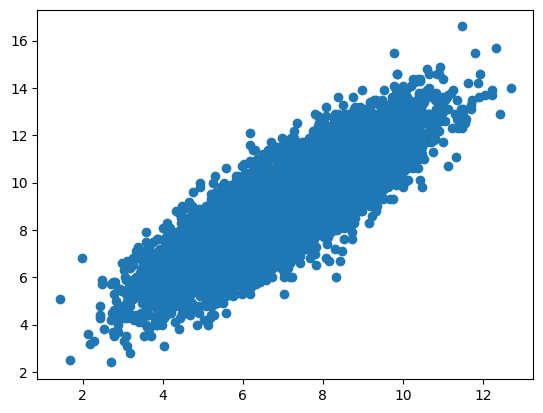

In [43]:
import matplotlib.pyplot as plt

plt.scatter(hours_direct_sunlight, mm_growth_per_day)

In [44]:
# create a dataframe with columns "hours_direct_sunlight_per_day" and "mm_growth_per_day" from lists
df = pd.DataFrame({'hours_direct_sunlight_per_day': hours_direct_sunlight, 'mm_growth_per_day': mm_growth_per_day})

In [45]:
# save as .csv file sunflowers.csv
df.to_csv('sunflowers.csv', index=False)

In [57]:
np.random.seed(100)
df = pd.read_csv('sunflowers.csv')
sample = df.sample(n=24)

# create a linear regression model. Set intercept to zero
model = LinearRegression()

y = sample[['mm_growth_per_day']]
X = sample[['hours_direct_sunlight_per_day']]

# fit the model
model.fit(X, y)

# return the standard error from the model

LinearRegression()

In [58]:
y_pred = model.predict(X)


In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mse = mean_squared_error(y, y_pred)

In [64]:
model.coef_

array([[0.89777921]])

In [67]:
model.intercept_

array([2.44941239])

In [68]:
model.score(X, y)

0.42208775341835425

In [70]:
r_squared = model.score(X, y)

# Number of observations
n = X.shape[0]

# Number of predictors
p = X.shape[1]

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1-r_squared) * (n-1) / (n-p-1)

print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.3958190149373704


In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming X (features) and y (target) are defined

# Fit the model
model = LinearRegression().fit(X, y)

# Predict the values
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Compute the sum of squared residuals
SSR = np.sum(residuals**2)

# Calculate the degrees of freedom (n - p - 1)
# n is the number of observations, p is the number of predictors
degrees_of_freedom = len(y) - X.shape[1] - 1

# Calculate the standard error of the regression
SER = np.sqrt(SSR / degrees_of_freedom)

print("Standard Error of the Regression (SER):", SER)

Standard Error of the Regression (SER): mm_growth_per_day    1.306596
dtype: float64


c:\Users\treharne\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
